In [1]:
import numpy as np
import cv2
import os
import PIL
import matplotlib.pyplot as plt
import sys
import torch

In [2]:
path_train = "../Data/dataset DRIVE/training/images/"
training_images = os.listdir(path_train)

In [3]:
train_images = {}
for i in sorted(training_images):
    number = i[0:2]
    img = np.array(PIL.Image.open(f'{path_train}{i}').convert("RGB"))
    train_images[str(number)] =  img

Text(0.5, 1.0, '21')

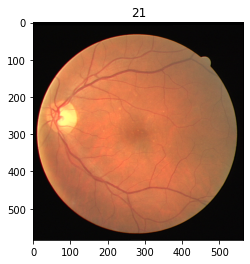

In [4]:
plt.imshow(train_images['21'])
plt.title('21')

In [5]:
#Procesado de los labels

In [6]:
path_labels = "../Data/dataset DRIVE/training/1st_manual/"
training_labels = os.listdir(path_labels)
labels = {}
for image in training_labels:
    img = np.array(PIL.Image.open(f'{path_labels}{image}').convert("L"), dtype=np.float32)
    labels[image[0:2]] = img
    #El label solo tiene 1 canal, el hecho de que haya 3 es por la librería
    #gif2numpy pero son los 3 idénticos (frame[0][:,:,0]=frame[0][:,:,1]=frame[0][:,:,2])

Text(0.5, 1.0, '21')

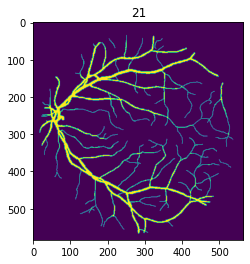

In [7]:
plt.imshow(labels['21'])
plt.title('21')

Text(0.5, 1.0, '21')

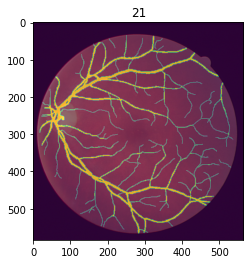

In [8]:
plt.imshow(labels['21'], alpha=1)
plt.imshow(train_images['21'], alpha=0.4)
plt.title('21')

In [9]:
sys.path.append("./Utils")
from utils import get_loaders
import torch.nn as nn
from torchvision import transforms

In [10]:
# Hyperparams
LEARNING_RATE = 1e-4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 4
NUM_EPOCHS = 100
NUM_WORKERS = 0
IMAGE_H = 520
IMAGE_W = 500
PIN_MEMORY = True
LOAD_MODEL = False
TRAIN_IMG_DIR = "/Users/alberto/Desktop/TFM/Data/dataset DRIVE/training/images"
TRAIN_MASK_DIR = "/Users/alberto/Desktop/TFM/Data/dataset DRIVE/training/1st_manual"
VAL_IMG_DIR = "/Users/alberto/Desktop/TFM/Data/dataset DRIVE/validation/images"
VAL_MASK_DIR = "/Users/alberto/Desktop/TFM/Data/dataset DRIVE/validation/1st_manual"

In [11]:
from utils import get_loaders

In [12]:
   train_loader, val_loader = get_loaders(
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        NUM_WORKERS,
        PIN_MEMORY,
    )

Feature batch shape: torch.Size([4, 3, 565, 584])
Labels batch shape: torch.Size([4, 565, 584])
The Train image numbers present in the batch are: ('29', '28', '22', '30')


Text(0.5, 1.0, '29')

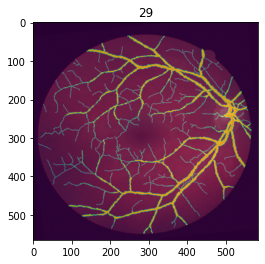

In [17]:
train_features, train_labels, numbers = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(f"The Train image numbers present in the batch are: {numbers}")
img = train_features[0].squeeze()
label = train_labels[0]
number = numbers[0]
plt.imshow(label, alpha=1)
plt.imshow(img.permute(1, 2, 0) , alpha=0.4)
plt.title(number)

In [15]:
import sys
sys.path.append('./Models')
from U_net import UNET

In [16]:
# Test
x = torch.randn((4, 3, 160, 160))
model = UNET(in_channels=3, out_channels=1)
preds = model(x)
assert preds.shape[2:] == x.shape[2:]

x = torch.randn((train_features.shape))
x = x.view(x.shape[0], 3, x.shape[2], -1)
preds = model(x)
assert preds.shape[2:] == x.shape[2:]

In [19]:
print(train_features.shape)
# Habrá que cambiar la forma de las imágenes de entrada a
# [batch, channels, H, V] actualmente está en [batch, H, V, channels]

torch.Size([4, 3, 565, 584])
